# Displacements due to pressure variations in reservoir

This code aims at reproducing the results presented by Tempone et al. (2010, figs 5a and 5b)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import datetime
from scipy.special import ellipk, ellipe, ellipkinc, ellipeinc

In [2]:
import compaction as cp
import geertsma as ge

In [3]:
# Define the model
#model1 = cp.prism_layer_circular((0,0), 500, (20,20), 850, 800)
#model2 = cp.prism_layer_circular((0,0), 500, (20,20), 800, 750)
#model = np.vstack([model1, model2])
R = 500. #radius of the cilinder 
Nx,Ny,Nz = 20, 20, 1 #number of cilinders in each direction
top = 750. #reservoir top
bottom = 850. #reservoir bottom
h = bottom - top #reservoir thickness

model = cp.prism_layer_circular((0,0), R, (Ny,Nx), bottom, top) #used in Sharma's methodology
model2 = cp.prism_layer_circular((0,0), R, (1,1), bottom, top) #used in Geertsma's methodology - one cilinder

In [4]:
model.shape

(316, 6)

In [5]:
# Pressure variation (in MPa)
DP = np.zeros(len(model)) + 10

In [6]:
# Young’s modulus (in MPa)
young = 3300

# Poisson coefficient
poisson = 0.25

In [7]:
cm = cp.Cm(poisson, young) # uniaxial compaction coefficient in 1/MPa
G = young/(2*(1+poisson)) # Shear Modulus in MPa
cm, G

(0.0002525252525252525, 1320.0)

### Coordinates on the plane x = 0 m

In [8]:
# Define computation points on vertical plane at x = 0m
shape = (120, 24)
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])
y, z = np.meshgrid(y, z)
y = y.ravel()
z = z.ravel()
x = np.zeros_like(y)
coord1 = np.vstack([y, x, z])

In [9]:
coord1.shape

(3, 2880)

### Compute the displacement and stress components on plane x = 0 m

### Sharma

In [10]:
# Compute the x-component of displacement
d_x1 = cp.field_component(coord1, model, DP, poisson, young, kernel='d_x1')

d_x2 = cp.field_component(coord1, model, DP, poisson, young, kernel='d_x2')

d_xz2 = cp.field_component(coord1, model, DP, poisson, young, kernel='d_xz2')

displacement_x = d_x1 + (3 - 4*poisson)*d_x2 + d_xz2

In [11]:
# Compute the y-component of displacement
d_y1 = cp.field_component(coord1, model, DP, poisson, young, kernel='d_y1')

d_y2 = cp.field_component(coord1, model, DP, poisson, young, kernel='d_y2')

d_yz2 = cp.field_component(coord1, model, DP, poisson, young, kernel='d_yz2')

displacement_y = d_y1 + (3 - 4*poisson)*d_y2 + d_yz2

In [12]:
# Compute the z-component of displacement
d_z1 = cp.field_component(coord1, model, DP, poisson, young, kernel='d_z1')

d_z2 = cp.field_component(coord1, model, DP, poisson, young, kernel='d_z2')

d_zz2 = cp.field_component(coord1, model, DP, poisson, young, kernel='d_zz2')

displacement_z = d_z1 - (3 - 4*poisson)*d_z2 + d_zz2

In [13]:
# horizontal component of displacement
displacement_horizontal = np.sqrt(displacement_x**2 + displacement_y**2)

In [14]:
# Compute the x-component of stress
s_xz1 = cp.field_component(coord1, model, DP, poisson, young, kernel='s_xz1')

s_xz2 = cp.field_component(coord1, model, DP, poisson, young, kernel='s_xz2')

s_xzz2 = cp.field_component(coord1, model, DP, poisson, young, kernel='s_xzz2')

# Tempone et al (2010)
#stress_x = s_xz1 + s_xzz2 - s_xz2
#stress_x *= -young/(1 + poisson)
# Sharma (1956)
stress_x = s_xz1 + s_xzz2 + s_xz2
stress_x *= young/(1 + poisson)

In [15]:
# Compute the y-component of stress
s_yz1 = cp.field_component(coord1, model, DP, poisson, young, kernel='s_yz1')

s_yz2 = cp.field_component(coord1, model, DP, poisson, young, kernel='s_yz2')

s_yzz2 = cp.field_component(coord1, model, DP, poisson, young, kernel='s_yzz2')

# Tempone et al (2010)
#stress_y = s_yz1 + s_yzz2 - s_yz2
#stress_y *= -young/(1 + poisson)
# Sharma (1956)
stress_y = s_yz1 + s_yzz2 + s_yz2
stress_y *= young/(1 + poisson)

In [16]:
# Compute the z-component of stress
s_zz1 = cp.field_component(coord1, model, DP, poisson, young, kernel='s_zz1')

s_zz2 = cp.field_component(coord1, model, DP, poisson, young, kernel='s_zz2')

s_zzz2 = cp.field_component(coord1, model, DP, poisson, young, kernel='s_zzz2')

# Tempone et al (2010)
#stress_z = s_zz1 + s_zzz2 - s_zz2
#stress_z *= -young/(1 + poisson)
# Sharma (1956)
stress_z = s_zz1 + s_zzz2 - s_zz2
stress_z *= young/(1 + poisson)

In [17]:
# horizontal component of stress
stress_horizontal = np.sqrt(stress_x**2 + stress_y**2)
#stress_horizontal = stress_z - np.sqrt(stress_x**2 + stress_y**2)

### Geertsma

In [18]:
inicio_date = datetime.datetime.now()
ur, uz = ge.geertsma(coord1, model2, DP, cm, poisson, R, h)
fim_date = datetime.datetime.now()

print "Total time: ", fim_date - inicio_date
print "ur: ", np.min(ur), np.max(ur), np.shape(ur)
print "uz: ", np.min(uz), np.max(uz), np.shape(uz)

Total time:  0:00:00.423319
ur:  -0.13427101065934444 -0.0026572344600220847 (2880,)
uz:  -0.14439807629928475 0.09589437803939907 (2880,)


In [19]:
inicio_date = datetime.datetime.now()
sr, st, sz = ge.geertsma_stress(coord1, model2, DP, cm, poisson, R, h, G)
fim_date = datetime.datetime.now()

print "Total time: ", fim_date - inicio_date
print "sr: ", np.min(sr), np.max(sr), np.shape(sr)
print "st: ", np.min(st), np.max(st), np.shape(st)
print "sz: ", np.min(sz), np.max(sz), np.shape(sz)

Total time:  0:00:00.712639
sr:  -3.18822730536103 2.38931846557321 (2880,)
st:  0.012088402272078736 0.735095732692142 (2880,)
sz:  -2.619563206935467 2.946530329968566 (2880,)


In [20]:
# horizontal component of stress
# sh = np.sqrt(sr**2 + st**2)

### Plot the results on plane x = 0 m - Sharma

In [21]:
y = np.linspace(-1500, 1500, shape[0])
z = np.linspace(0, 1200, shape[1])

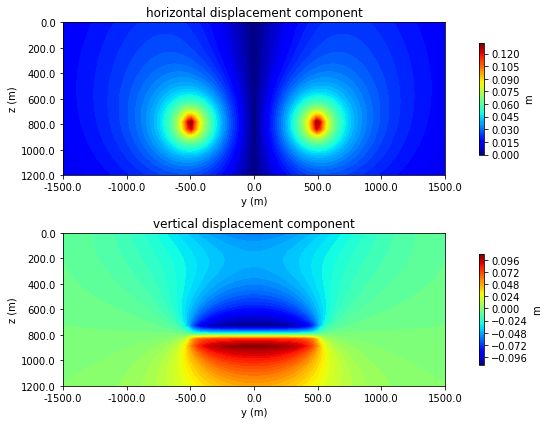

In [22]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, displacement_horizontal.reshape(shape[::-1]), 
                     60, cmap="jet")
# img = ax[0].contourf(y, z, displacement_y.reshape(shape[::-1]), 
#                      60, cmap="jet")
plt.colorbar(img, ax=ax[0], pad=0.04, shrink=0.73, label="m")
ax[0].set_title("horizontal displacement component")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("y (m)")
ax[0].set_ylabel("z (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, displacement_z.reshape(shape[::-1]),  
                  60, cmap="jet")
plt.colorbar(img, ax=ax[1], pad=0.04, shrink=0.73, label="m")
ax[1].set_title("vertical displacement component")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("y (m)")
ax[1].set_ylabel("z (m)")

plt.tight_layout()
plt.show()

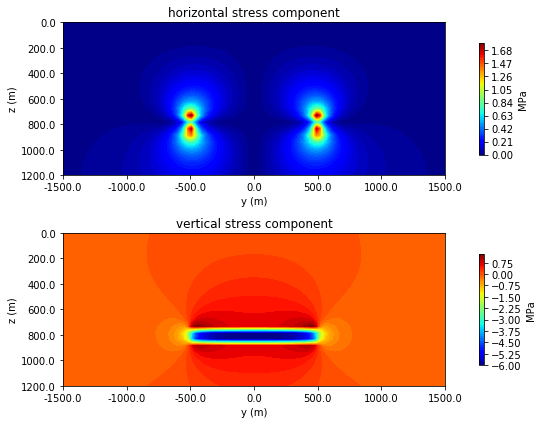

In [23]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, stress_horizontal.reshape(shape[::-1]), 
                  60, cmap="jet")
# img = ax[0].contourf(y, z, stress_y.reshape(shape[::-1]), 
#                      60, cmap="jet")
plt.colorbar(img, ax=ax[0], pad=0.04, shrink=0.73, label="MPa")
ax[0].set_title("horizontal stress component")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("y (m)")
ax[0].set_ylabel("z (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, stress_z.reshape(shape[::-1]),  
                  60, cmap="jet")
plt.colorbar(img, ax=ax[1], pad=0.04, shrink=0.73, label="MPa")
ax[1].set_title("vertical stress component")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("y (m)")
ax[1].set_ylabel("z (m)")

plt.tight_layout()
plt.show()

### Plot the results on plane x = 0 m - Geertsma

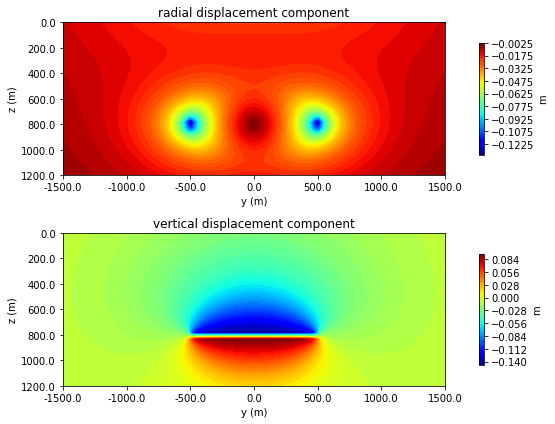

In [24]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False, sharey=False, figsize=(12,6))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, ur.reshape(shape[::-1]), 
                     60, cmap="jet")
plt.colorbar(img, ax=ax[0], pad=0.04, shrink=0.73, label="m")
ax[0].set_title("radial displacement component")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("y (m)")
ax[0].set_ylabel("z (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, uz.reshape(shape[::-1]),  
                  60, cmap="jet")
plt.colorbar(img, ax=ax[1], pad=0.04, shrink=0.73, label="m")
ax[1].set_title("vertical displacement component")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("y (m)")
ax[1].set_ylabel("z (m)")

plt.tight_layout()
plt.show()

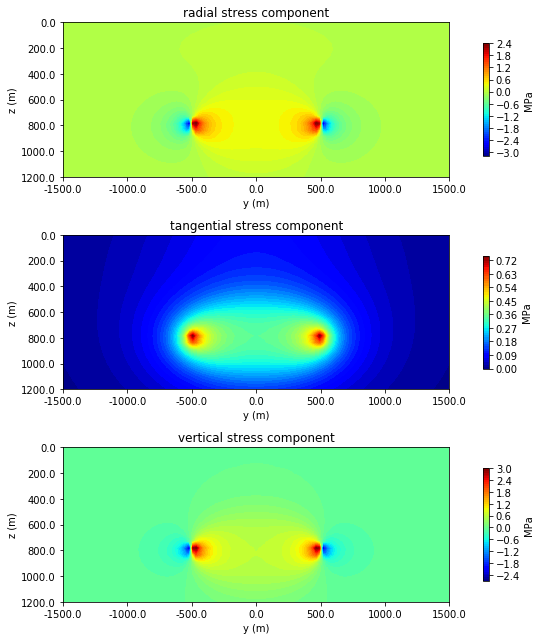

In [25]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=False, figsize=(12,9))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, sr.reshape(shape[::-1]), 
                     60, cmap="jet")
plt.colorbar(img, ax=ax[0], pad=0.04, shrink=0.73, label="MPa")
ax[0].set_title("radial stress component")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("y (m)")
ax[0].set_ylabel("z (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, st.reshape(shape[::-1]),  
                  60, cmap="jet")
plt.colorbar(img, ax=ax[1], pad=0.04, shrink=0.73, label="MPa")
ax[1].set_title("tangential stress component")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("y (m)")
ax[1].set_ylabel("z (m)")

ax[2].set_aspect("equal")
img = ax[2].contourf(y, z, sz.reshape(shape[::-1]),  
                  60, cmap="jet")
plt.colorbar(img, ax=ax[2], pad=0.04, shrink=0.73, label="MPa")
ax[2].set_title("vertical stress component")

ax[2].set_xticklabels(ax[2].get_xticks())
ax[2].set_yticklabels(ax[2].get_yticks())
ax[2].invert_yaxis()
ax[2].set_xlabel("y (m)")
ax[2].set_ylabel("z (m)")

plt.tight_layout()
plt.show()

## Comparison between Sharma and Geertsma

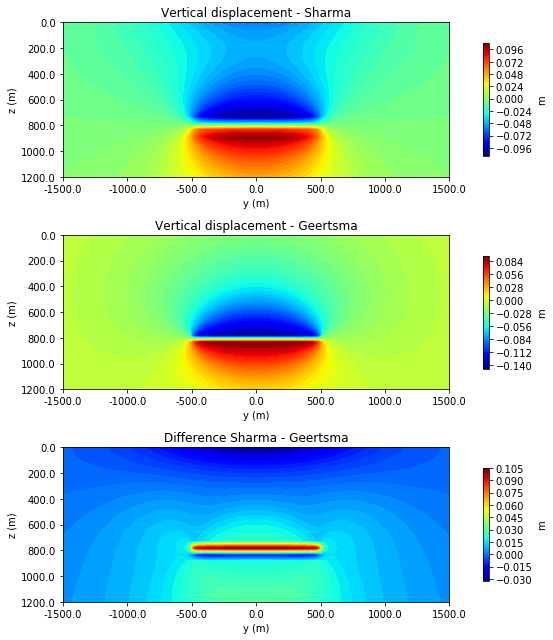

In [26]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=True, figsize=(12.,9.))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, displacement_z.reshape(shape[::-1]), 
                     60, cmap="jet")
plt.colorbar(img, ax=ax[0], pad=0.04, shrink=0.73, label="m")
ax[0].set_title("Vertical displacement - Sharma")
ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("y (m)")
ax[0].set_ylabel("z (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, uz.reshape(shape[::-1]), 
                     60, cmap="jet")
plt.colorbar(img, ax=ax[1], pad=0.04, shrink=0.73, label="m")
ax[1].set_title("Vertical displacement - Geertsma")
ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("y (m)")
ax[1].set_ylabel("z (m)")

ax[2].set_aspect("equal")
img = ax[2].contourf(y, z,displacement_z.reshape(shape[::-1]) - uz.reshape(shape[::-1]), 
                     60, cmap="jet")
plt.colorbar(img, ax=ax[2], pad=0.04, shrink=0.73, label="m")
ax[2].set_title("Difference Sharma - Geertsma")
ax[2].set_xticklabels(ax[2].get_xticks())
ax[2].set_yticklabels(ax[2].get_yticks())
ax[2].invert_yaxis()
ax[2].set_xlabel("y (m)")
ax[2].set_ylabel("z (m)")

plt.tight_layout()
plt.show()

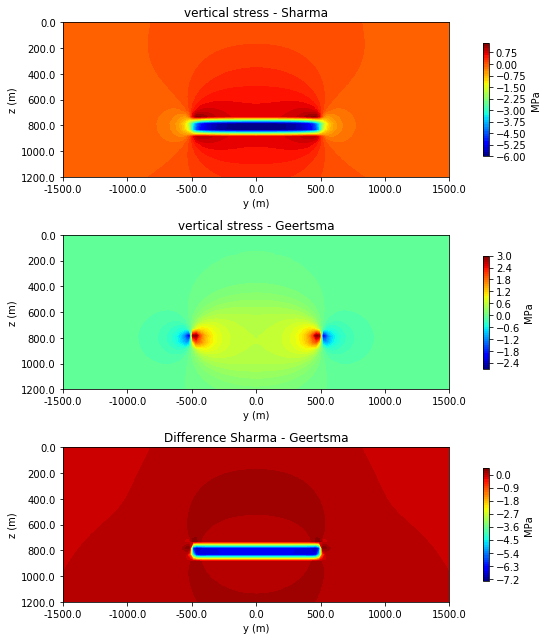

In [27]:
fig, ax = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=True, figsize=(12,9))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, z, stress_z.reshape(shape[::-1]), 
                  60, cmap="jet")
plt.colorbar(img, ax=ax[0], pad=0.04, shrink=0.73, label="MPa")
ax[0].set_title("vertical stress - Sharma")
ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].invert_yaxis()
ax[0].set_xlabel("y (m)")
ax[0].set_ylabel("z (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, z, sz.reshape(shape[::-1]), 
                  60, cmap="jet")
plt.colorbar(img, ax=ax[1], pad=0.04, shrink=0.73, label="MPa")
ax[1].set_title("vertical stress - Geertsma")
ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].invert_yaxis()
ax[1].set_xlabel("y (m)")
ax[1].set_ylabel("z (m)")

ax[2].set_aspect("equal")
img = ax[2].contourf(y, z, stress_z.reshape(shape[::-1]) - sz.reshape(shape[::-1]), 
                     60, cmap="jet")
plt.colorbar(img, ax=ax[2], pad=0.04, shrink=0.73, label="MPa")
ax[2].set_title("Difference Sharma - Geertsma")
ax[2].set_xticklabels(ax[2].get_xticks())
ax[2].set_yticklabels(ax[2].get_yticks())
ax[2].invert_yaxis()
ax[2].set_xlabel("y (m)")
ax[2].set_ylabel("z (m)")

plt.tight_layout()
plt.show()

### Coordinates on the free surface (z = 0 m) - Sharma

In [28]:
# Define computation points on the plane z = 0m
shape = (60, 60)
y = np.linspace(-1500, 1500, shape[0])
x = np.linspace(-1500, 1500, shape[1])
y, x = np.meshgrid(y, x)
y = y.ravel()
x = x.ravel()
z = np.zeros_like(x)
coord2 = np.vstack([y, x, z])

In [29]:
# Compute the x-component of stress
s_xz1 = cp.field_component(coord2, model, DP, poisson, young, kernel='s_xz1')

s_xz2 = cp.field_component(coord2, model, DP, poisson, young, kernel='s_xz2')

s_xzz2 = cp.field_component(coord2, model, DP, poisson, young, kernel='s_xzz2')

stress_x = s_xz1 + s_xzz2 + s_xz2
stress_x *= young/(1 + poisson)

In [30]:
# Compute the y-component of stress
s_yz1 = cp.field_component(coord2, model, DP, poisson, young, kernel='s_yz1')

s_yz2 = cp.field_component(coord2, model, DP, poisson, young, kernel='s_yz2')

s_yzz2 = cp.field_component(coord2, model, DP, poisson, young, kernel='s_yzz2')

stress_y = s_yz1 + s_yzz2 + s_yz2
stress_y *= young/(1 + poisson)

In [31]:
# Compute the z-component of stress
s_zz1 = cp.field_component(coord2, model, DP, poisson, young, kernel='s_zz1')

s_zz2 = cp.field_component(coord2, model, DP, poisson, young, kernel='s_zz2')

s_zzz2 = cp.field_component(coord2, model, DP, poisson, young, kernel='s_zzz2')

stress_z = s_zz1 + s_zzz2 - s_zz2
stress_z *= young/(1 + poisson)

### Coordinates on the free surface (z = 0 m) - Geertsma

In [32]:
#Model with several cilinders
inicio_date = datetime.datetime.now()
ur, uz = ge.geertsma(coord2, model2, DP, cm, poisson, R, h)
sr, st, sz = ge.geertsma_stress(coord2, model, DP, cm, poisson, R, h, G)
fim_date = datetime.datetime.now()

print "Total time: ", fim_date - inicio_date
print "ur: ", np.min(ur), np.max(ur), np.shape(ur)
print "uz: ", np.min(uz), np.max(uz), np.shape(uz)
print "sr: ", np.min(sr), np.max(sr), np.shape(sr)
print "st: ", np.min(st), np.max(st), np.shape(st)
print "sz: ", np.min(sz), np.max(sz), np.shape(sz)

Total time:  0:03:34.501852
ur:  -0.023155930237556178 -0.007779791176422717 (3600,)
uz:  -0.026735993114933916 -0.0028372814168318417 (3600,)
sr:  -10.838893147951934 -2.974130977649399 (3600,)
st:  2.3228140836886744 26.22942978943717 (3600,)
sz:  0.0 0.0 (3600,)


### Plot the results on plane z = 0 m - Sharma

In [33]:
y = np.linspace(-1500, 1500, shape[0])
x = np.linspace(-1500, 1500, shape[1])

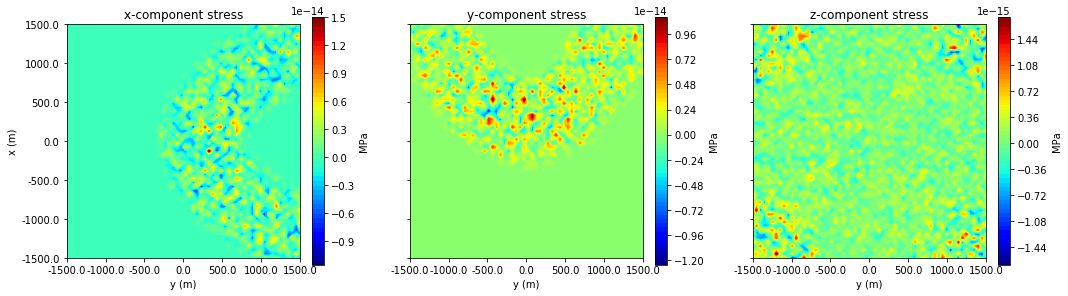

In [34]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(15,5))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, x, stress_x.reshape(shape), 
                  60, cmap="jet")
plt.colorbar(img, ax=ax[0], pad=0.04, shrink=0.73, label="MPa")
ax[0].set_title("x-component stress")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].set_xlabel("y (m)")
ax[0].set_ylabel("x (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, x, stress_y.reshape(shape),  
                  60, cmap="jet")
plt.colorbar(img, ax=ax[1], pad=0.04, shrink=0.73, label="MPa")
ax[1].set_title("y-component stress")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].set_xlabel("y (m)")
#ax[1].set_ylabel("x (m)")

ax[2].set_aspect("equal")
img = ax[2].contourf(y, x, stress_z.reshape(shape),  
                  60, cmap="jet")
plt.colorbar(img, ax=ax[2], pad=0.04, shrink=0.73, label="MPa")
ax[2].set_title("z-component stress")

ax[2].set_xticklabels(ax[2].get_xticks())
ax[2].set_yticklabels(ax[2].get_yticks())
ax[2].set_xlabel("y (m)")
#ax[2].set_ylabel("x (m)")

plt.tight_layout()
plt.show()

### Plot the results on plane z = 0 m - Geertsma

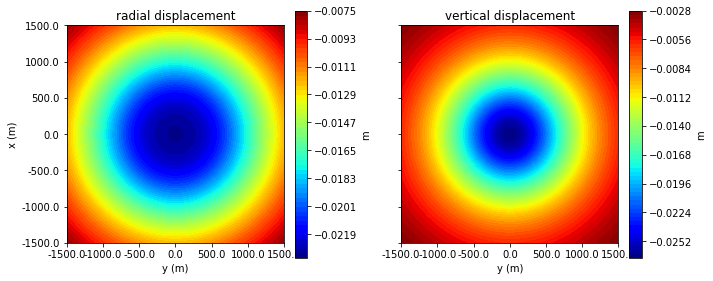

In [35]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=(10,5))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, x, ur.reshape(shape), 
                  60, cmap="jet")
plt.colorbar(img, ax=ax[0], pad=0.04, shrink=0.73, label="m")
ax[0].set_title("radial displacement")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].set_xlabel("y (m)")
ax[0].set_ylabel("x (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, x, uz.reshape(shape),  
                  60, cmap="jet")
plt.colorbar(img, ax=ax[1], pad=0.04, shrink=0.73, label="m")
ax[1].set_title("vertical displacement")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].set_xlabel("y (m)")
#ax[1].set_ylabel("x (m)")

plt.tight_layout()
plt.show()

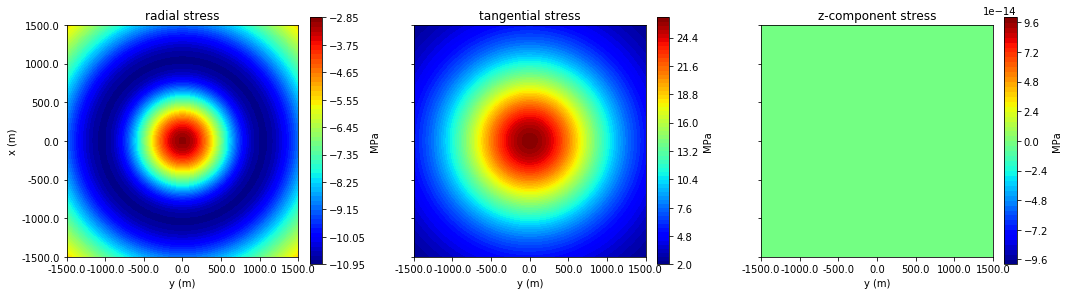

In [36]:
# Plot the results on a map
fig, ax = plt.subplots(nrows=1, ncols=3, sharex=False, sharey=True, figsize=(15,5))

ax[0].set_aspect("equal")
img = ax[0].contourf(y, x, sr.reshape(shape), 
                  60, cmap="jet")
plt.colorbar(img, ax=ax[0], pad=0.04, shrink=0.73, label="MPa")
ax[0].set_title("radial stress")

ax[0].set_xticklabels(ax[0].get_xticks())
ax[0].set_yticklabels(ax[0].get_yticks())
ax[0].set_xlabel("y (m)")
ax[0].set_ylabel("x (m)")

ax[1].set_aspect("equal")
img = ax[1].contourf(y, x, st.reshape(shape),  
                  60, cmap="jet")
plt.colorbar(img, ax=ax[1], pad=0.04, shrink=0.73, label="MPa")
ax[1].set_title("tangential stress")

ax[1].set_xticklabels(ax[1].get_xticks())
ax[1].set_yticklabels(ax[1].get_yticks())
ax[1].set_xlabel("y (m)")
#ax[1].set_ylabel("x (m)")

ax[2].set_aspect("equal")
img = ax[2].contourf(y, x, sz.reshape(shape),  
                  60, cmap="jet")
plt.colorbar(img, ax=ax[2], pad=0.04, shrink=0.73, label="MPa")
ax[2].set_title("z-component stress")

ax[2].set_xticklabels(ax[2].get_xticks())
ax[2].set_yticklabels(ax[2].get_yticks())
ax[2].set_xlabel("y (m)")
#ax[2].set_ylabel("x (m)")

plt.tight_layout()
plt.show()

### Coordinates along a well located at edge of the reservoir

In [37]:
# Define computation points
z = np.linspace(0, 1200, 100)
x = np.zeros_like(z) + 500
y = np.zeros_like(z)
coord3 = np.vstack([y, x, z])

### Compute the displacement components along a well located at edge of the reservoir - Sharma

In [38]:
# Compute the x-component
d_x1 = cp.field_component(coord3, model, DP, poisson, young, kernel='d_x1')

d_x2 = cp.field_component(coord3, model, DP, poisson, young, kernel='d_x2')

d_xz2 = cp.field_component(coord3, model, DP, poisson, young, kernel='d_xz2')

displacement_x = d_x1 + (3 - 4*poisson)*d_x2 + d_xz2

In [39]:
# Compute the y-component
d_y1 = cp.field_component(coord3, model, DP, poisson, young, kernel='d_y1')

d_y2 = cp.field_component(coord3, model, DP, poisson, young, kernel='d_y2')

d_yz2 = cp.field_component(coord3, model, DP, poisson, young, kernel='d_yz2')

displacement_y = d_y1 + (3 - 4*poisson)*d_y2 + d_yz2

In [40]:
# Compute the z-component
d_z1 = cp.field_component(coord3, model, DP, poisson, young, kernel='d_z1')

d_z2 = cp.field_component(coord3, model, DP, poisson, young, kernel='d_z2')

d_zz2 = cp.field_component(coord3, model, DP, poisson, young, kernel='d_zz2')

displacement_z = d_z1 - (3 - 4*poisson)*d_z2 + d_zz2

In [41]:
# horizontal component
displacement_horizontal = np.sqrt(displacement_x**2 + displacement_y**2)

### Compute the displacement components along a well located at edge of the reservoir - Geertsma

In [42]:
inicio_date = datetime.datetime.now()
ur, uz = ge.geertsma(coord3, model2, DP, cm, poisson, R, h)
fim_date = datetime.datetime.now()

print "Total time: ", fim_date - inicio_date
print "ur: ", np.min(ur), np.max(ur), np.shape(ur)
print "uz: ", np.min(uz), np.max(uz), np.shape(uz)

Total time:  0:00:00.044513
ur:  -inf -0.018320813459888275 (100,)
uz:  nan nan (100,)


geertsma.py:126: RuntimeWarning: invalid value encountered in double_scalars
  beta = np.arcsin(q/np.sqrt(q**2 + (R-r)**2))
geertsma.py:135: RuntimeWarning: invalid value encountered in double_scalars
  2*R) + np.heaviside(R-r, 0.5)/R
/home/andre/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


### Plot the results along the well

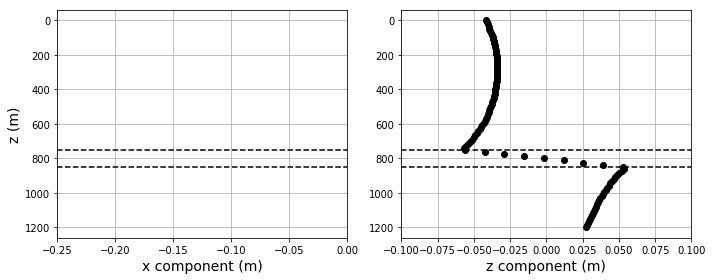

In [43]:
# Plot the results on a map - Sharma
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10,4))

ax[0].plot(displacement_x, z, 'k.-')
ax[0].plot([-0.25, 0], [750, 750], 'k--')
ax[0].plot([-0.25, 0], [850, 850], 'k--')
ax[0].set_xlim(-0.25, 0)
ax[0].invert_yaxis()
ax[0].set_xlabel("x component (m)", fontsize=14)
ax[0].set_ylabel("z (m)", fontsize=14)
ax[0].grid()

ax[1].plot(displacement_z, z, 'ko')
ax[1].plot([-0.1, 0.1], [750, 750], 'k--')
ax[1].plot([-0.1, 0.1], [850, 850], 'k--')
ax[1].set_xlim(-0.1, 0.1)
ax[1].invert_yaxis()
ax[1].set_xlabel("z component (m)", fontsize=14)
#ax[1].set_ylabel("z (m)")
ax[1].grid()

plt.tight_layout()
plt.show()

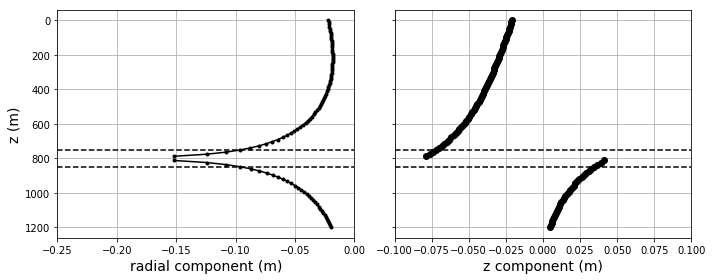

In [44]:
#Plot the results on a map - Geertsma
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=True, figsize=(10,4))

ax[0].plot(ur, z, 'k.-')
ax[0].plot([-0.25, 0], [750, 750], 'k--')
ax[0].plot([-0.25, 0], [850, 850], 'k--')
ax[0].set_xlim(-0.25, 0)
# ax[0].invert_yaxis()
ax[0].set_xlabel("radial component (m)", fontsize=14)
ax[0].set_ylabel("z (m)", fontsize=14)
ax[0].grid()

ax[1].plot(uz, z, 'ko')
ax[1].plot([-0.1, 0.1], [750, 750], 'k--')
ax[1].plot([-0.1, 0.1], [850, 850], 'k--')
ax[1].set_xlim(-0.1, 0.1)
ax[1].invert_yaxis()
ax[1].set_xlabel("z component (m)", fontsize=14)
#ax[1].set_ylabel("z (m)")
ax[1].grid()

plt.tight_layout()
plt.show()

### Coordinates along at the top, center and bottom of the cylindrical reservoir

In [45]:
# Define computation points
z_top = np.zeros(100) + 750
z_center = np.zeros(100) + 800
z_bottom = np.zeros(100) + 850
x = np.linspace(0, 600, 100)
y = np.zeros_like(x)
coordinates_top = np.vstack([y, x, z_top])
coordinates_center = np.vstack([y, x, z_center])
coordinates_bottom = np.vstack([y, x, z_bottom])

### Compute the displacement components - Sharma

In [46]:
# Compute the x-component at the top
d_x1_top = cp.field_component(coordinates_top, model, DP, poisson, young, kernel='d_x1')

d_x2_top = cp.field_component(coordinates_top, model, DP, poisson, young, kernel='d_x2')

d_xz2_top = cp.field_component(coordinates_top, model, DP, poisson, young, kernel='d_xz2')

displacement_x_top = d_x1_top + (3 - 4*poisson)*d_x2_top + d_xz2_top

In [47]:
# Compute the z-component at the top
d_z1_top = cp.field_component(coordinates_top, model, DP, poisson, young, kernel='d_z1')

d_z2_top = cp.field_component(coordinates_top, model, DP, poisson, young, kernel='d_z2')

d_zz2_top = cp.field_component(coordinates_top, model, DP, poisson, young, kernel='d_zz2')

displacement_z_top = d_z1_top - (3 - 4*poisson)*d_z2_top + d_zz2_top

In [48]:
# Compute the x-component at the center
d_x1_center = cp.field_component(coordinates_center, model, DP, poisson, young, kernel='d_x1')

d_x2_center = cp.field_component(coordinates_center, model, DP, poisson, young, kernel='d_x2')

d_xz2_center = cp.field_component(coordinates_center, model, DP, poisson, young, kernel='d_xz2')

displacement_x_center = d_x1_center + (3 - 4*poisson)*d_x2_center + d_xz2_center

In [49]:
# Compute the z-component at the center
d_z1_center = cp.field_component(coordinates_center, model, DP, poisson, young, kernel='d_z1')

d_z2_center = cp.field_component(coordinates_center, model, DP, poisson, young, kernel='d_z2')

d_zz2_center = cp.field_component(coordinates_center, model, DP, poisson, young, kernel='d_zz2')

displacement_z_center = d_z1_center - (3 - 4*poisson)*d_z2_center + d_zz2_center

In [50]:
# Compute the x-component at the bottom
d_x1_bottom = cp.field_component(coordinates_bottom, model, DP, poisson, young, kernel='d_x1')

d_x2_bottom = cp.field_component(coordinates_bottom, model, DP, poisson, young, kernel='d_x2')

d_xz2_bottom = cp.field_component(coordinates_bottom, model, DP, poisson, young, kernel='d_xz2')

displacement_x_bottom = d_x1_bottom + (3 - 4*poisson)*d_x2_bottom + d_xz2_bottom

In [51]:
# Compute the z-component at the bottom
d_z1_bottom = cp.field_component(coordinates_bottom, model, DP, poisson, young, kernel='d_z1')

d_z2_bottom = cp.field_component(coordinates_bottom, model, DP, poisson, young, kernel='d_z2')

d_zz2_bottom = cp.field_component(coordinates_bottom, model, DP, poisson, young, kernel='d_zz2')

displacement_z_bottom = d_z1_bottom - (3 - 4*poisson)*d_z2_bottom + d_zz2_bottom

### Compute the displacement components - Geertsma

In [52]:
# Compute the components at the top
inicio_date = datetime.datetime.now()
ur_top, uz_top = ge.geertsma(coordinates_top, model2, DP, cm, poisson, R, h)
fim_date = datetime.datetime.now()

print "Total time: ", fim_date - inicio_date
print "ur: ", np.min(ur_top), np.max(ur_top), np.shape(ur_top)
print "uz: ", np.min(uz_top), np.max(uz_top), np.shape(uz_top)

Total time:  0:00:00.015510
ur:  -0.09534635005044231 -0.00612715746273295 (100,)
uz:  -0.13671761958940643 -0.029754629732671237 (100,)


In [53]:
# Compute the components at the center
inicio_date = datetime.datetime.now()
ur_center, uz_center = ge.geertsma(coordinates_center, model2, DP, cm, poisson, R, h)
fim_date = datetime.datetime.now()

print "Total time: ", fim_date - inicio_date
print "ur: ", np.min(ur_center), np.max(ur_center), np.shape(ur_center)
print "uz: ", np.min(uz_center), np.max(uz_center), np.shape(uz_center)

Total time:  0:00:00.017199
ur:  nan nan (100,)
uz:  nan nan (100,)


geertsma.py:103: RuntimeWarning: invalid value encountered in double_scalars
  I1 = 2*((1-(m/2))*K - E0)/(np.pi*np.sqrt(m*r*R))
geertsma.py:113: RuntimeWarning: invalid value encountered in double_scalars
  I2 = q*np.sqrt(m)*((1-m/2)*E0/(1-m) - K)/(2*np.pi*np.sqrt(r*R)**3)
geertsma.py:146: RuntimeWarning: invalid value encountered in double_scalars
  I4 = np.sqrt(m)**3*(R**2-r**2-q**2)*E0/(8*np.pi*np.sqrt(r*R)**3*R*(1-m)) + np.sqrt(m)*K0/(
geertsma.py:147: RuntimeWarning: invalid value encountered in double_scalars
  2*np.pi*R*np.sqrt(r*R))
geertsma.py:49: RuntimeWarning: invalid value encountered in double_scalars
  zp+zc,r,R) - 2*zp*Int4(zp+zc,r,R))


In [54]:
# Compute the components at the bottom
inicio_date = datetime.datetime.now()
ur_bottom, uz_bottom = ge.geertsma(coordinates_bottom, model2, DP, cm, poisson, R, h)
fim_date = datetime.datetime.now()

print "Total time: ", fim_date - inicio_date
print "ur: ", np.min(ur_bottom), np.max(ur_bottom), np.shape(ur_bottom)
print "uz: ", np.min(uz_bottom), np.max(uz_bottom), np.shape(uz_bottom)

Total time:  0:00:00.015390
ur:  -0.09517700057147808 -0.006114159340007367 (100,)
uz:  -0.004915751672157549 0.09231898144948551 (100,)


### Plot the results at the top, center and bottom of the reservoir

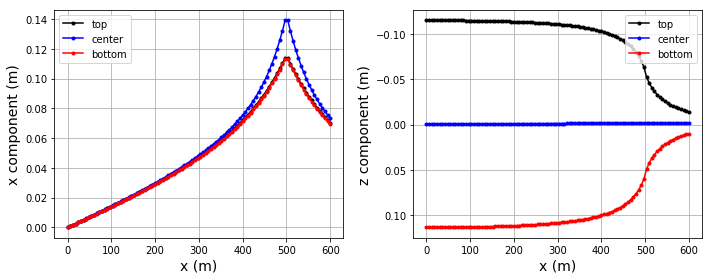

In [55]:
#Sharma
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10,4))

ax[0].plot(x, displacement_x_top, 'k.-', label='top')
ax[0].plot(x, displacement_x_center, 'b.-', label='center')
ax[0].plot(x, displacement_x_bottom, 'r.-', label='bottom')
#ax[0].plot([-0.25, 0], [800, 800], 'k--')
#ax[0].set_xlim(-0.25, 0)
#ax[0].invert_yaxis()
ax[0].set_xlabel("x (m)", fontsize=14)
ax[0].set_ylabel("x component (m)", fontsize=14)
ax[0].grid()
ax[0].legend(loc='best')

ax[1].plot(x, displacement_z_top, 'k.-', label='top')
ax[1].plot(x, displacement_z_center, 'b.-', label='center')
ax[1].plot(x, displacement_z_bottom, 'r.-', label='bottom')
# ax[1].plot([-0.1, 0.1], [800, 800], 'k--')
# ax[1].plot([-0.1, 0.1], [900, 900], 'k--')
#ax[1].set_xlim(-0.1, 0.1)
ax[1].invert_yaxis()
ax[1].set_xlabel("x (m)", fontsize=14)
ax[1].set_ylabel("z component (m)", fontsize=14)
ax[1].grid()
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()

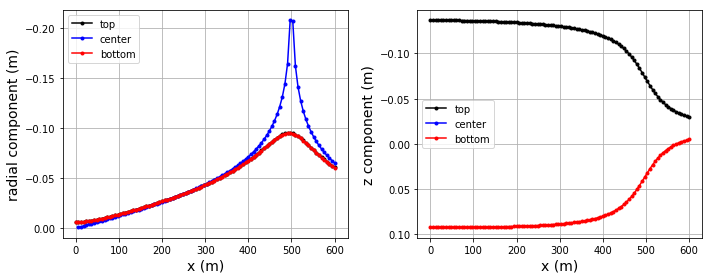

In [56]:
#Geertsma
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(10,4))

ax[0].plot(x, ur_top, 'k.-', label='top')
ax[0].plot(x, ur_center, 'b.-', label='center')
ax[0].plot(x, ur_bottom, 'r.-', label='bottom')
#ax[0].plot([-0.25, 0], [800, 800], 'k--')
#ax[0].set_xlim(-0.25, 0)
ax[0].invert_yaxis()
ax[0].set_xlabel("x (m)", fontsize=14)
ax[0].set_ylabel("radial component (m)", fontsize=14)
ax[0].grid()
ax[0].legend(loc='best')

ax[1].plot(x, uz_top, 'k.-', label='top')
ax[1].plot(x, uz_center, 'b.-', label='center')
ax[1].plot(x, uz_bottom, 'r.-', label='bottom')
# ax[1].plot([-0.1, 0.1], [800, 800], 'k--')
# ax[1].plot([-0.1, 0.1], [900, 900], 'k--')
#ax[1].set_xlim(-0.1, 0.1)
ax[1].invert_yaxis()
ax[1].set_xlabel("x (m)", fontsize=14)
ax[1].set_ylabel("z component (m)", fontsize=14)
ax[1].grid()
ax[1].legend(loc='best')

plt.tight_layout()
plt.show()